In [1]:
# Imports we will use
import torch
import gc
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Function
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import random
from pathlib import Path
from sklearn.metrics import r2_score
from astropy.visualization import make_lupton_rgb
from sklearn.manifold import Isomap
from train_utils import *
import time
import os
import json

%matplotlib inline
plt.rcParams.update({'font.size': 12})

# Set Seed
torch.manual_seed(22)

# Find if cuda is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Load Data

In [2]:
# Specify paths, load in data, and subsample labels
head = Path.cwd().parents[1]
source_img_path = head / 'data/mb_lenscolor_source/mb_lenscolor_source.npy'
target_img_path = head / 'data/mb_lenscolor_target/mb_lenscolor_target.npy'
source_meta = head / 'data/mb_lenscolor_source/mb_lenscolor_source_metadata.csv'
target_meta = head / 'data/mb_lenscolor_target/mb_lenscolor_target_metadata.csv'
batch_size = 32
source_train_dataloader, source_test_dataloader, source_val_dataloader, source_data = create_dataloader(source_img_path, source_meta, batch_size)
target_train_dataloader, target_test_dataloader, target_val_dataloader, target_data = create_dataloader(target_img_path, target_meta, batch_size)
isomap_source_label_sample = pd.read_csv(source_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]
isomap_target_label_sample = pd.read_csv(target_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]

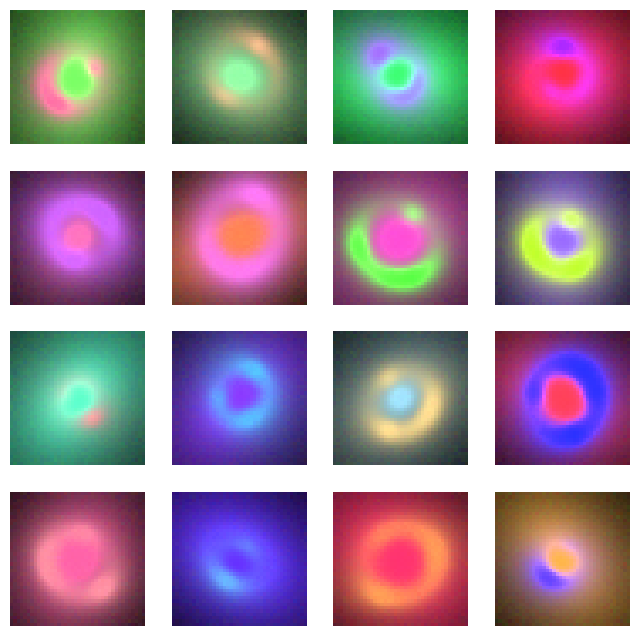

In [3]:
# Visualize source data
visualize_data(source_data)

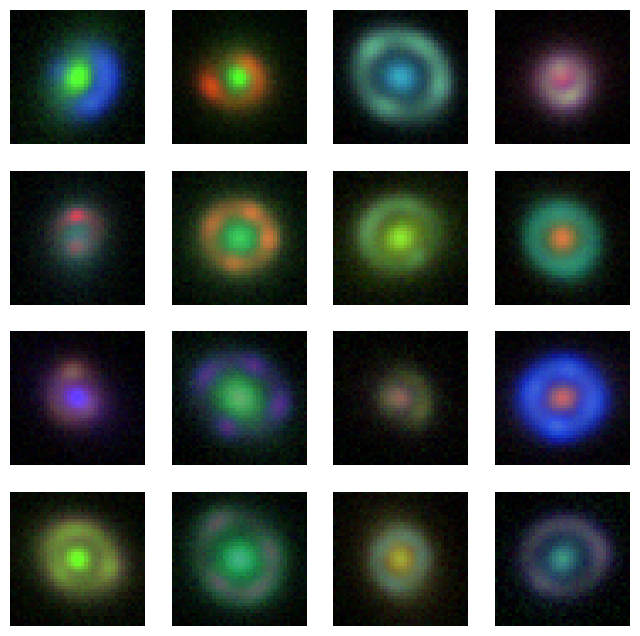

In [4]:
# Visualize target data
visualize_data(target_data)

## Model Setup

In [5]:
# Choose how you prefer to evolve beta and the DA Weight
def da_weight_function(epoch):
    """ Linear evolving DA weighting in loss function. """
    da_weight = init_wt_da - ((init_wt_da - final_wt_da) * (epoch / n_epoch))
    return da_weight

def beta_function(epoch):
    """ Linear evolving beta weighting in loss function until halfway through total epochs. """
    beta_val = beta_init - (beta_init - beta_final) * (epoch / n_epoch)
    return beta_val

# Initialize hyperparameters
learning_rate = 1e-5
n_epoch = 150
init_wt_da = 1.4
final_wt_da = 1.0
beta_init = 1.0
beta_final = 0.4

In [6]:
# Initialize model
model = NeuralNetworkMVE(npix=40).cuda()

# Loss Functions / Optimizers
regressor_loss_fn = nn.MSELoss().cuda()
da_loss_fn = MMD_loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
# To continue training from a past model, enter path into load_mod_name
# Else, enter None, and you still have to run the function.
# Then, enter save_mod_name to save for the current run  

load_mod_name = None # "models/start_code_test_2"
stats, model, optimizer, best_target_R2, best_mve_loss = initialize_state(load_mod_name, model, optimizer)


#save_mod_name = load_mod_name # may overwrite loaded model
save_mod_name = "models/mve_v2_aug4_1900"

## Train

Beginning Training...
Generating Isomap...


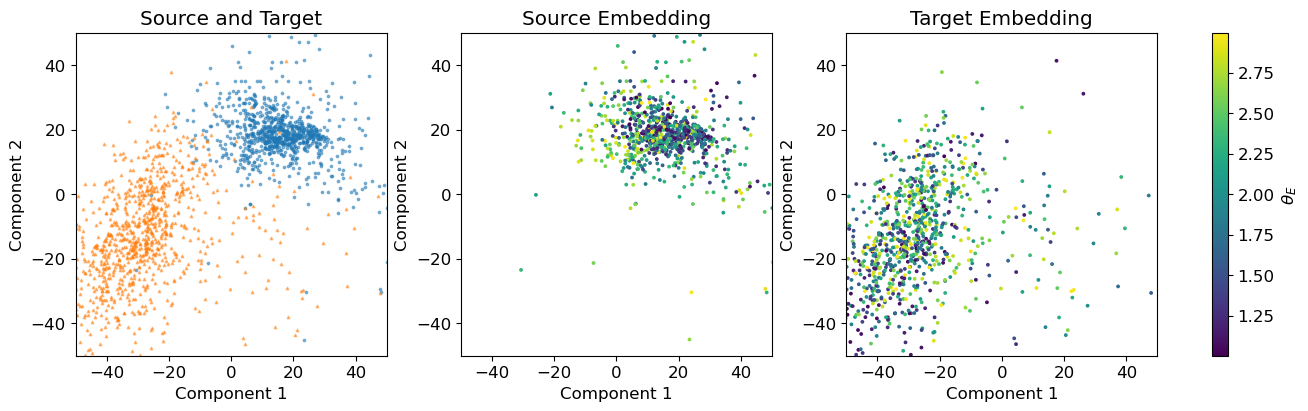


Epoch 0: 15.79s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.4225
	Train Regression Loss: : 2.0230
	Train Mve Loss: : 0.8719
	Train R2 Score: : -5.3901
 Validation Statistics:
	Val Source Regression Loss: : 0.6986
	Val Target Regression Loss: : 0.7129
	Val Source R2 Score: : -1.1912
	Val Target R2 Score: : -1.2598
	Val Source Mve Loss: : 0.2236
	Val Target Mve Loss: : 0.2264
Saving Model MVE... Done.

Epoch 1: 11.32s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.2611
	Train Regression Loss: : 0.3961
	Train Mve Loss: : 0.0493
	Train R2 Score: : -0.2353
 Validation Statistics:
	Val Source Regression Loss: : 0.2937
	Val Target Regression Loss: : 0.3127
	Val Source R2 Score: : 0.0804
	Val Target R2 Score: : 0.0247
	Val Source Mve Loss: : -0.0277
	Val Target Mve Loss: : -0.0173
Saving Model... Done.
Saving Model MVE... Done.

Epoch 2: 11.73s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.2042
	Train Regress

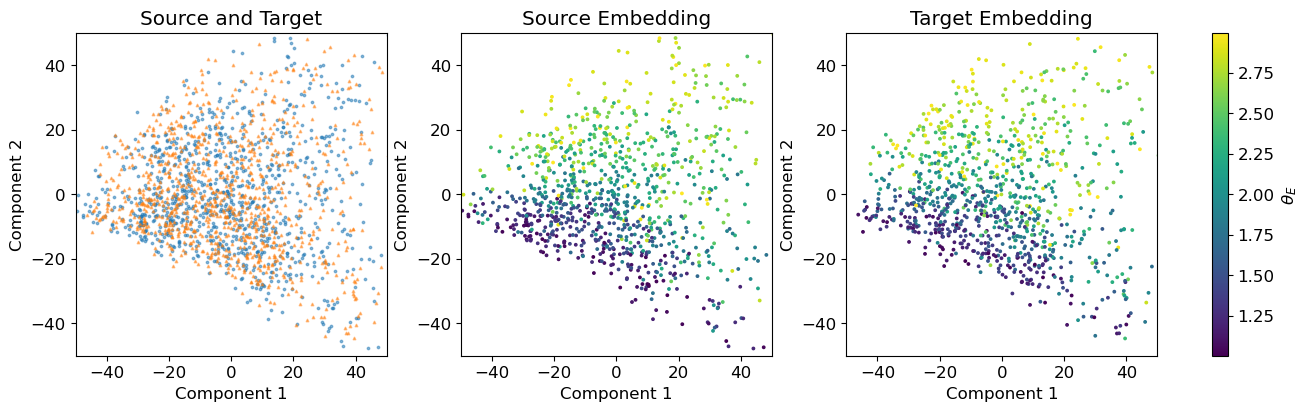

Saving Model... Done.

Epoch 20: 11.80s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1410
	Train Regression Loss: : 0.0320
	Train Mve Loss: : -0.0549
	Train R2 Score: : 0.8989
 Validation Statistics:
	Val Source Regression Loss: : 0.0340
	Val Target Regression Loss: : 0.0339
	Val Source R2 Score: : 0.8923
	Val Target R2 Score: : 0.8931
	Val Source Mve Loss: : -0.0498
	Val Target Mve Loss: : -0.0494
Saving Model... Done.

Epoch 21: 12.20s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1409
	Train Regression Loss: : 0.0312
	Train Mve Loss: : -0.0725
	Train R2 Score: : 0.9015
 Validation Statistics:
	Val Source Regression Loss: : 0.0337
	Val Target Regression Loss: : 0.0341
	Val Source R2 Score: : 0.8944
	Val Target R2 Score: : 0.8922
	Val Source Mve Loss: : -0.0421
	Val Target Mve Loss: : -0.0407

Epoch 22: 15.02s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1392
	Train Regression Loss: : 0.0311
	Train M

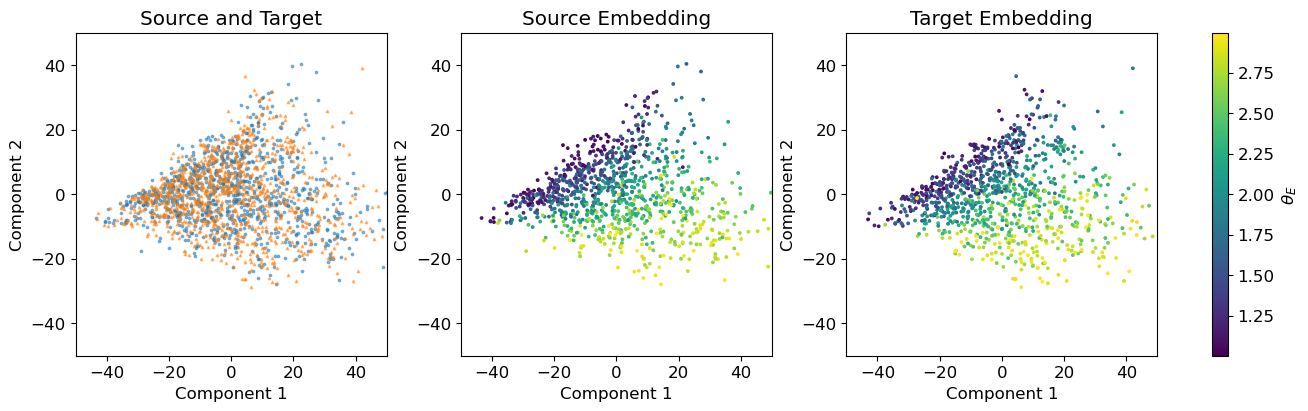

Saving Model... Done.

Epoch 40: 10.47s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1394
	Train Regression Loss: : 0.0267
	Train Mve Loss: : -0.0691
	Train R2 Score: : 0.9156
 Validation Statistics:
	Val Source Regression Loss: : 0.0279
	Val Target Regression Loss: : 0.0286
	Val Source R2 Score: : 0.9118
	Val Target R2 Score: : 0.9071
	Val Source Mve Loss: : -0.0473
	Val Target Mve Loss: : -0.0452

Epoch 41: 10.10s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1369
	Train Regression Loss: : 0.0264
	Train Mve Loss: : -0.1171
	Train R2 Score: : 0.9174
 Validation Statistics:
	Val Source Regression Loss: : 0.0272
	Val Target Regression Loss: : 0.0295
	Val Source R2 Score: : 0.9155
	Val Target R2 Score: : 0.9054
	Val Source Mve Loss: : -0.0707
	Val Target Mve Loss: : -0.0682

Epoch 42: 10.01s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1379
	Train Regression Loss: : 0.0265
	Train Mve Loss: : -0.0860
	Tr

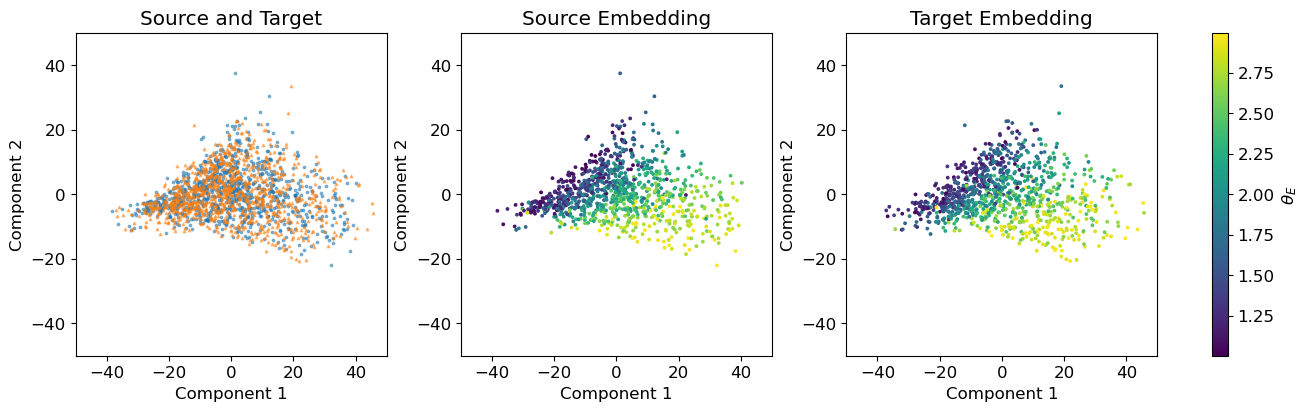


Epoch 60: 13.45s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1394
	Train Regression Loss: : 0.0238
	Train Mve Loss: : -0.0806
	Train R2 Score: : 0.9252
 Validation Statistics:
	Val Source Regression Loss: : 0.0249
	Val Target Regression Loss: : 0.0257
	Val Source R2 Score: : 0.9225
	Val Target R2 Score: : 0.9176
	Val Source Mve Loss: : -0.0862
	Val Target Mve Loss: : -0.0846
Saving Model... Done.

Epoch 61: 13.93s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1406
	Train Regression Loss: : 0.0238
	Train Mve Loss: : -0.0964
	Train R2 Score: : 0.9249
 Validation Statistics:
	Val Source Regression Loss: : 0.0262
	Val Target Regression Loss: : 0.0269
	Val Source R2 Score: : 0.9176
	Val Target R2 Score: : 0.9137
	Val Source Mve Loss: : -0.2002
	Val Target Mve Loss: : -0.1994
Saving Model MVE... Done.

Epoch 62: 13.79s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1395
	Train Regression Loss: : 0.0234
	Tra

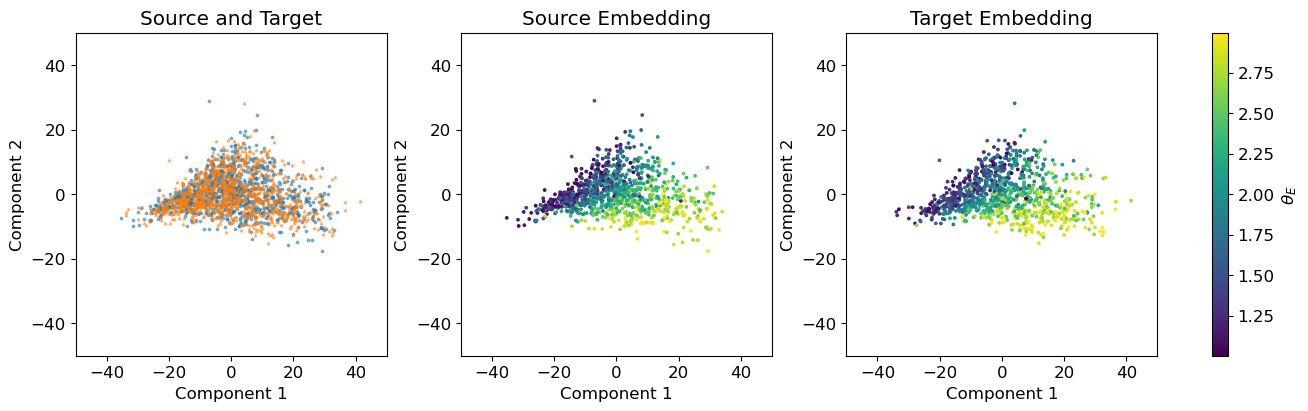


Epoch 80: 10.76s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1404
	Train Regression Loss: : 0.0213
	Train Mve Loss: : -0.1087
	Train R2 Score: : 0.9328
 Validation Statistics:
	Val Source Regression Loss: : 0.0229
	Val Target Regression Loss: : 0.0241
	Val Source R2 Score: : 0.9284
	Val Target R2 Score: : 0.9238
	Val Source Mve Loss: : -0.1072
	Val Target Mve Loss: : -0.1045

Epoch 81: 10.29s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1398
	Train Regression Loss: : 0.0214
	Train Mve Loss: : -0.1112
	Train R2 Score: : 0.9322
 Validation Statistics:
	Val Source Regression Loss: : 0.0227
	Val Target Regression Loss: : 0.0239
	Val Source R2 Score: : 0.9287
	Val Target R2 Score: : 0.9243
	Val Source Mve Loss: : -0.0995
	Val Target Mve Loss: : -0.0953
Saving Model... Done.

Epoch 82: 12.62s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1420
	Train Regression Loss: : 0.0214
	Train Mve Loss: : -0.1154
	Tr

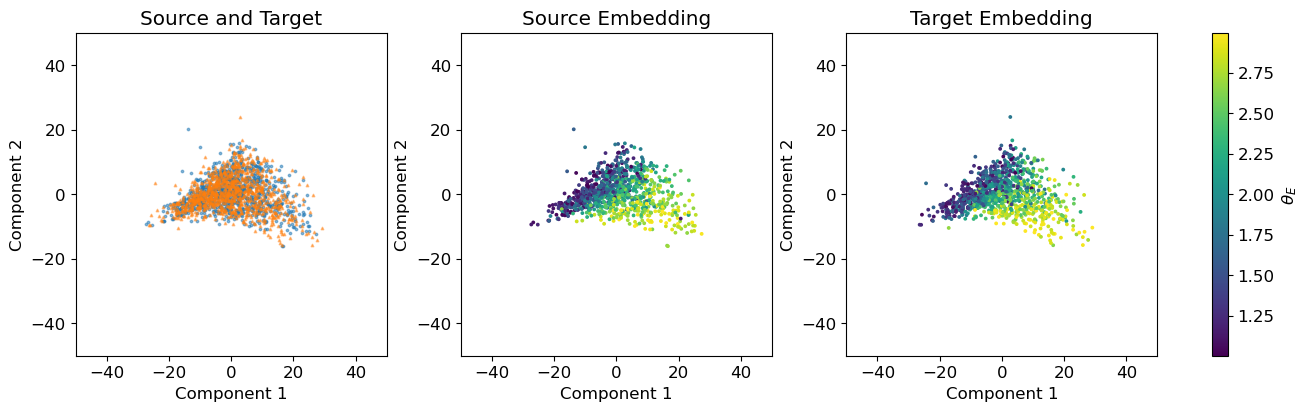


Epoch 100: 10.39s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1455
	Train Regression Loss: : 0.0198
	Train Mve Loss: : -0.1809
	Train R2 Score: : 0.9377
 Validation Statistics:
	Val Source Regression Loss: : 0.0211
	Val Target Regression Loss: : 0.0235
	Val Source R2 Score: : 0.9344
	Val Target R2 Score: : 0.9231
	Val Source Mve Loss: : -0.1443
	Val Target Mve Loss: : -0.1376

Epoch 101: 12.11s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1477
	Train Regression Loss: : 0.0197
	Train Mve Loss: : -0.1641
	Train R2 Score: : 0.9379
 Validation Statistics:
	Val Source Regression Loss: : 0.0210
	Val Target Regression Loss: : 0.0229
	Val Source R2 Score: : 0.9347
	Val Target R2 Score: : 0.9277
	Val Source Mve Loss: : -0.1278
	Val Target Mve Loss: : -0.1246

Epoch 102: 10.40s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1485
	Train Regression Loss: : 0.0199
	Train Mve Loss: : -0.1663
	Train R2 Score: : 0.9

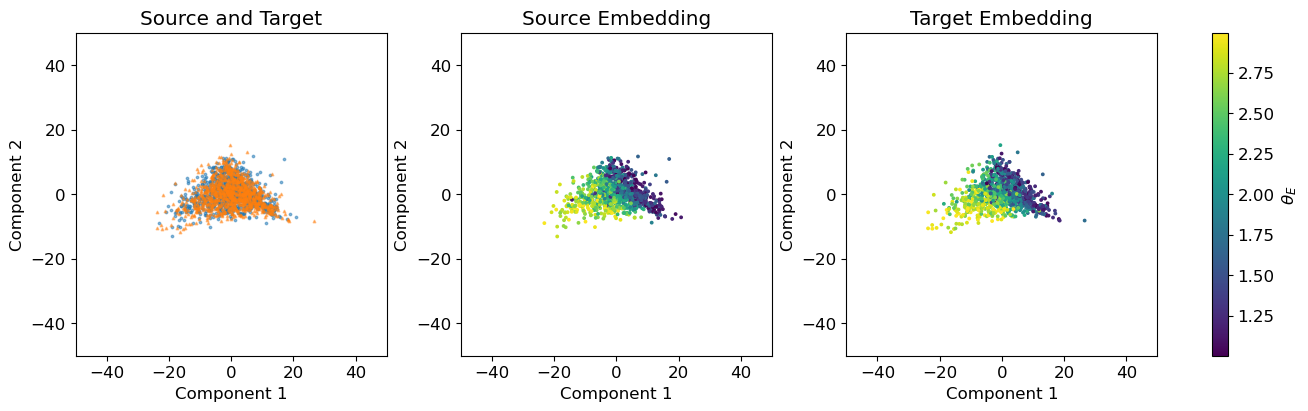


Epoch 120: 10.22s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1543
	Train Regression Loss: : 0.0202
	Train Mve Loss: : -0.2013
	Train R2 Score: : 0.9362
 Validation Statistics:
	Val Source Regression Loss: : 0.0200
	Val Target Regression Loss: : 0.0227
	Val Source R2 Score: : 0.9376
	Val Target R2 Score: : 0.9278
	Val Source Mve Loss: : -0.1205
	Val Target Mve Loss: : -0.1070

Epoch 121: 10.72s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1547
	Train Regression Loss: : 0.0205
	Train Mve Loss: : -0.2136
	Train R2 Score: : 0.9353
 Validation Statistics:
	Val Source Regression Loss: : 0.0205
	Val Target Regression Loss: : 0.0244
	Val Source R2 Score: : 0.9366
	Val Target R2 Score: : 0.9206
	Val Source Mve Loss: : -0.3309
	Val Target Mve Loss: : -0.3260
Saving Model MVE... Done.

Epoch 122: 11.00s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1547
	Train Regression Loss: : 0.0195
	Train Mve Loss: : -0.2

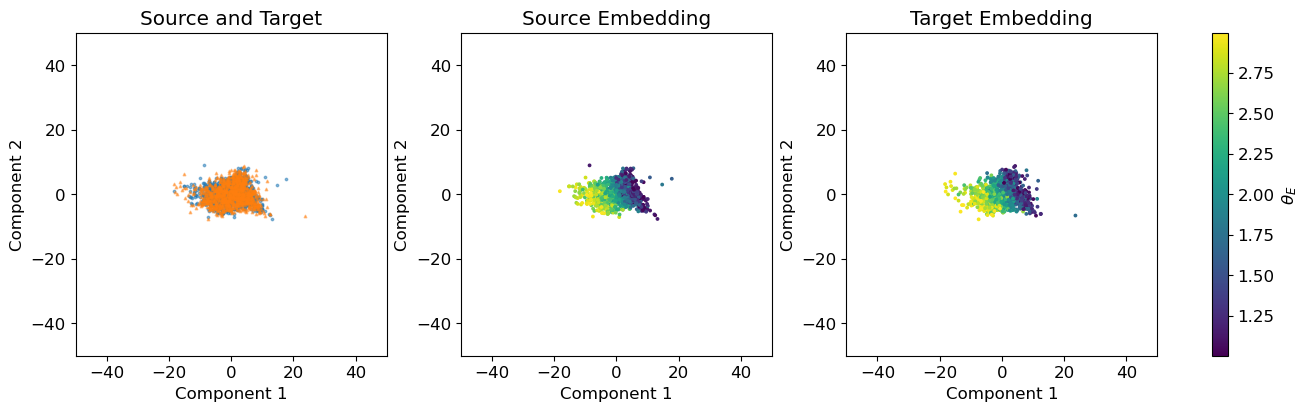

Saving Model... Done.

Epoch 140: 11.16s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1609
	Train Regression Loss: : 0.0198
	Train Mve Loss: : -0.2594
	Train R2 Score: : 0.9376
 Validation Statistics:
	Val Source Regression Loss: : 0.0184
	Val Target Regression Loss: : 0.0213
	Val Source R2 Score: : 0.9432
	Val Target R2 Score: : 0.9319
	Val Source Mve Loss: : -0.1024
	Val Target Mve Loss: : -0.1844

Epoch 141: 10.19s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1620
	Train Regression Loss: : 0.0194
	Train Mve Loss: : -0.2728
	Train R2 Score: : 0.9390
 Validation Statistics:
	Val Source Regression Loss: : 0.0188
	Val Target Regression Loss: : 0.0226
	Val Source R2 Score: : 0.9415
	Val Target R2 Score: : 0.9291
	Val Source Mve Loss: : -0.3887
	Val Target Mve Loss: : -0.3830
Saving Model MVE... Done.

Epoch 142: 10.23s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1614
	Train Regression Loss: : 0.0186
	

In [8]:
print("Beginning Training...")


for curr_epoch in range(stats['epoch_no'], stats['epoch_no'] + n_epoch):

        # Generate isomaps every 20 epochs
        if (curr_epoch % 20 == 0):
            print("Generating Isomap...")
            source_iso, target_iso = generate_isomaps(source_data, target_data, model)
            show_isomaps(source_iso, 
                         target_iso, 
                         isomap_source_label_sample, 
                         isomap_target_label_sample, 
                         save_mod_name, 
                         name = stats["epoch_no"], 
                         axlim = 50, save = True)

        # Save best models
        if (len(stats['val_target_r2_score']) > 0):
            
            # Save and overwrite model every best target R2
            if (stats['val_target_r2_score'][-1] > best_target_R2):
                print("Saving Model...", end = ' ')
                save_model(save_mod_name, model, optimizer, stats)
                best_target_R2 = stats['val_target_r2_score'][-1]
                print("Done.")
                
            # Save and overwrite model every best target MVE Loss
            if (stats['val_target_mve_loss'][-1] < best_mve_loss):
                print("Saving Model MVE...", end = ' ')
                mve_name = save_mod_name + "_mve"
                save_model(mve_name, model, optimizer, stats)
                best_mve_loss = stats['val_target_mve_loss'][-1]
                print("Done.")

        
        start_time = time.time()

        beta = beta_function(curr_epoch)
        da_weight = da_weight_function(curr_epoch)

        # Train, backpropagate
        vals = train_loop_mve(source_train_dataloader, 
                              target_train_dataloader, 
                              model,
                              regressor_loss_fn, 
                              da_loss_fn, 
                              optimizer,
                              da_weight, 
                              beta)

        # Test, validate metrics
        vals_validate = test_loop_mve(source_val_dataloader, 
                                      target_val_dataloader,
                                      model, 
                                      regressor_loss_fn, 
                                      beta)

        # Training Metrics
        stats['train_DA_loss'].append(vals[0])
        stats['train_regression_loss'].append(vals[1])
        stats['train_mve_loss'].append(vals[2])
        stats['train_r2_score'].append(vals[3])

        # Validation Metrics
        stats['val_source_regression_loss'].append(vals_validate[0])
        stats['val_target_regression_loss'].append(vals_validate[1])
        stats['val_source_r2_score'].append(vals_validate[2])
        stats['val_target_r2_score'].append(vals_validate[3])
        stats['val_source_mve_loss'].append(vals_validate[4])
        stats['val_target_mve_loss'].append(vals_validate[5])
        
        # Other Parameters
        stats['da_weight'].append(da_weight)
        stats['beta'].append(beta)
        stats['epoch_no'] += 1

        print_epoch_scores(stats, curr_epoch, time.time() - start_time)

In [9]:
# Saves the end result model after running for all stages, as well as the .json of stats

state = {
    'epoch': stats['epoch_no'],
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict(),
}
final_mod_name = save_mod_name + "_final"
torch.save(state, final_mod_name)
json.dump(stats, open(final_mod_name+'.json', 'w'))

## Visualize Results

In [10]:
# Loads a model for plotting/viz

viz_mod_name = final_mod_name # "models/start_code_test_4_final"
model.load_state_dict(torch.load(viz_mod_name)['state_dict'])
stats = json.load(open(viz_mod_name+'.json', 'r'))

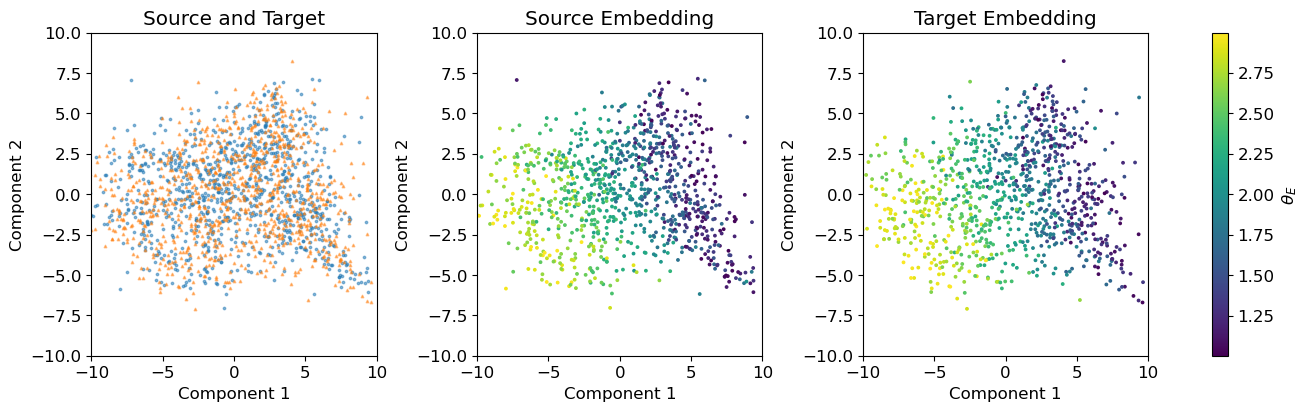

(<Figure size 1300x400 with 4 Axes>,
 array([<Axes: title={'center': 'Source and Target'}, xlabel='Component 1', ylabel='Component 2'>,
        <Axes: title={'center': 'Source Embedding'}, xlabel='Component 1', ylabel='Component 2'>,
        <Axes: title={'center': 'Target Embedding'}, xlabel='Component 1', ylabel='Component 2'>],
       dtype=object))

In [14]:
# Visualize isomaps 
trained_source_iso, trained_target_iso = generate_isomaps(source_data, target_data, model)
show_isomaps(trained_source_iso, trained_target_iso, isomap_source_label_sample, isomap_target_label_sample, viz_mod_name, axlim = 10)

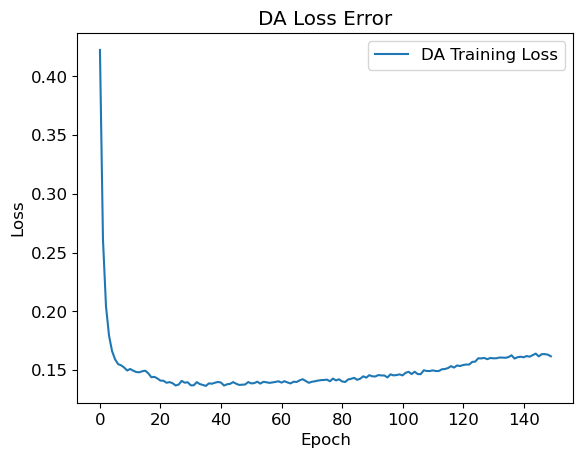

In [15]:
# DA Loss
fmt = lambda k: " ".join([i.capitalize() for i in k.split('_')])
eps = np.arange(stats["epoch_no"])
plt.title("DA Loss Error")
plt.plot(eps, stats['train_DA_loss'], label = "DA Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

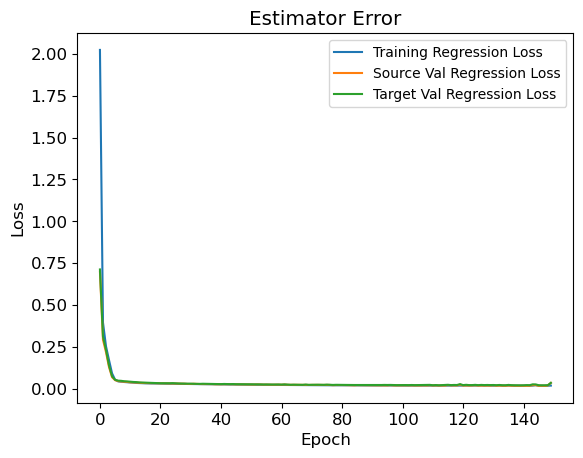

In [16]:
# Estimator / Regression
plt.title("Estimator Error")
plt.plot(eps, stats['train_regression_loss'], label = "Training Regression Loss")
plt.plot(eps, stats['val_source_regression_loss'], label = "Source Val Regression Loss")
plt.plot(eps, stats['val_target_regression_loss'], label = "Target Val Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize = 'small')

(-1.0, 1.0)

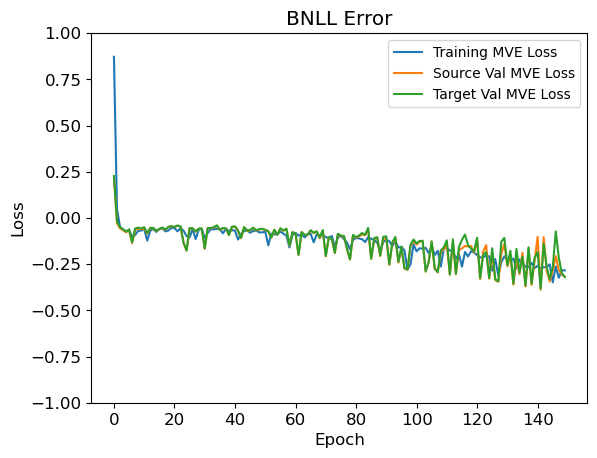

In [17]:
# BNLL for MVE
plt.title("BNLL Error")
plt.plot(eps, stats['train_mve_loss'], label = "Training MVE Loss")
plt.plot(eps, stats['val_source_mve_loss'], label = "Source Val MVE Loss")
plt.plot(eps, stats['val_target_mve_loss'], label = "Target Val MVE Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize = 'small')
plt.ylim(-1, 1)

(0.5, 1.0)

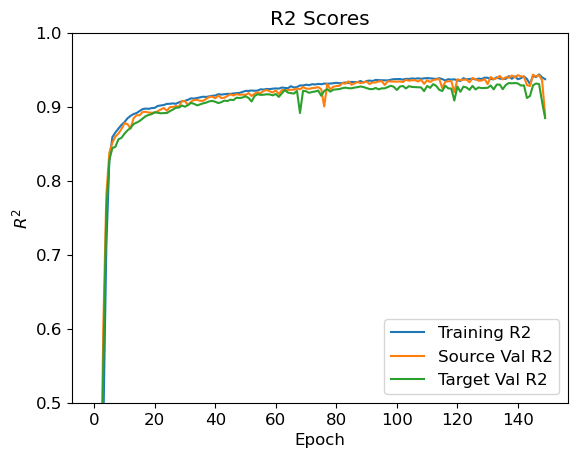

In [18]:
# R2 Scores
plt.title("R2 Scores")
plt.plot(eps, stats['train_r2_score'], label = "Training R2")
plt.plot(eps, stats['val_source_r2_score'], label = "Source Val R2")
plt.plot(eps, stats['val_target_r2_score'], label = "Target Val R2")
plt.xlabel("Epoch")
plt.ylabel("$R^2$")
plt.legend()
plt.ylim(0.5, 1)

In [19]:
# Test Source
var_preds_source = np.array([])
preds_source = np.array([])
true_source = np.array([])
lbnll_source = np.array([])
score_list = np.array([])

with torch.no_grad():
    for X, y in source_test_dataloader:
        X = X.float()
        pred, _ = model(X.cuda())
        preds_source = np.append(preds_source, pred[:, 0].cpu())
        var_preds_source = np.append(var_preds_source, pred[:, 1].cpu())
        true_source = np.append(true_source, y.cpu())
        score = r2_score(y.cpu(), pred[:, 0].cpu())
        score_list = np.append(score_list, score)
        lbnll_source = np.append(lbnll_source, loss_bnll(pred[:, 0].cpu(), pred[:, 1].cpu(), y, beta = 0.5))

score = np.mean(score_list)
print(f'Source R2 Score is {score:.4f}')

Source R2 Score is 0.8849


Text(0.5, 1.0, 'MMD | Source | R2: 0.885')

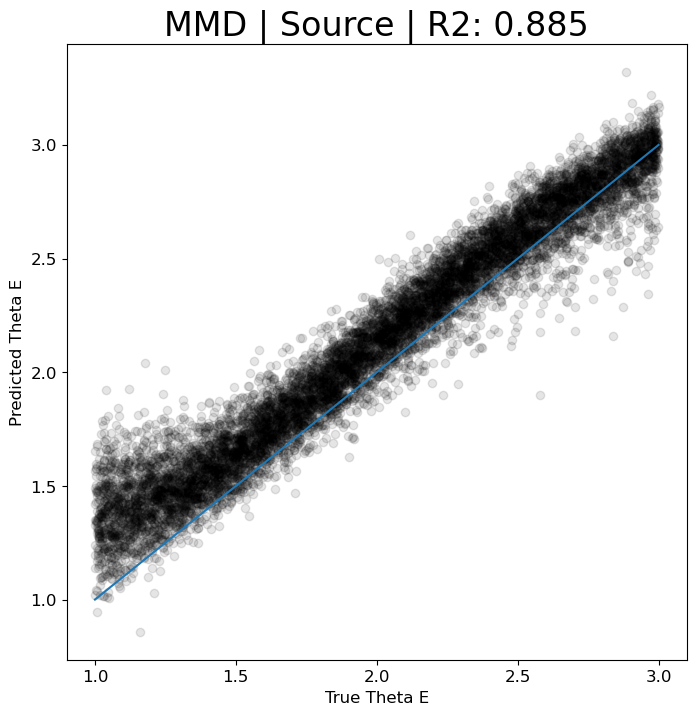

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(true_source, preds_source,  color='black', alpha = 0.1)
line = np.linspace(1, 3, 100)
plt.plot(line, line)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Source | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'Uncertainty | Source | BNLL: -0.234')

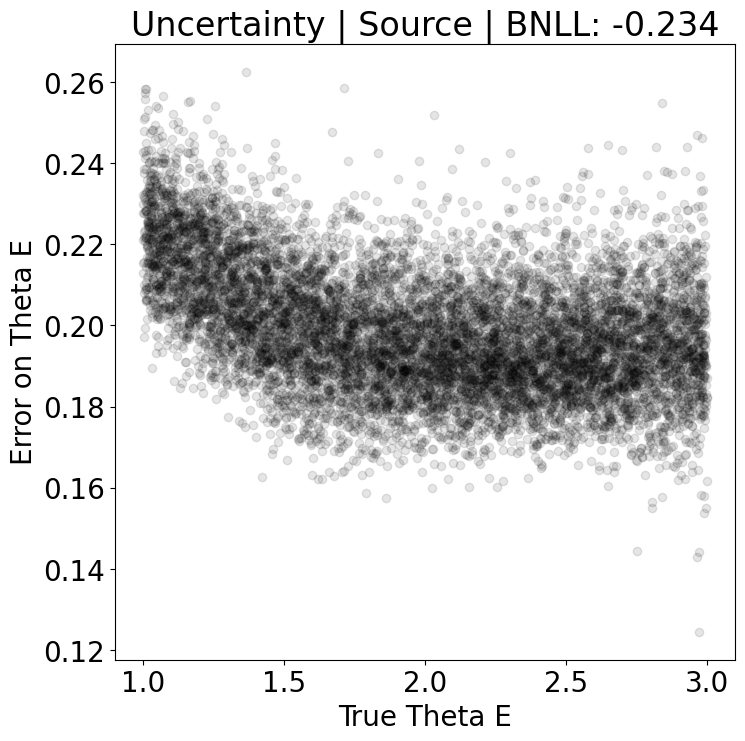

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(true_source, np.sqrt(var_preds_source),  color='black', alpha = 0.1)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Error on Theta E');
plt.rc('font', size=20)
plt.title('Uncertainty | Source | BNLL: {0:.3f}'.format(np.mean(lbnll_source)))

In [22]:
# Test target
preds_target = np.array([])
var_preds_target = np.array([])
true_target = np.array([])
score_list = np.array([])
lbnll_target = np.array([])


with torch.no_grad():
    for X, y in target_test_dataloader:
        X = X.float()
        pred, _ = model(X.cuda())
        preds_target = np.append(preds_target, pred[:, 0].cpu())
        var_preds_target = np.append(var_preds_target, pred[:, 1].cpu())
        true_target = np.append(true_target, y.cpu())
        score = r2_score(y.cpu(), pred[:, 0].cpu())
        score_list = np.append(score_list, score)
        lbnll_target = np.append(lbnll_target, loss_bnll(pred[:, 0].cpu(), pred[:, 1].cpu(), y, beta = 0.5))


score = np.mean(score_list)
print(f'Target R2 Score is {score:.4f}')

Target R2 Score is 0.8817


Text(0.5, 1.0, 'MMD | Target | R2: 0.882')

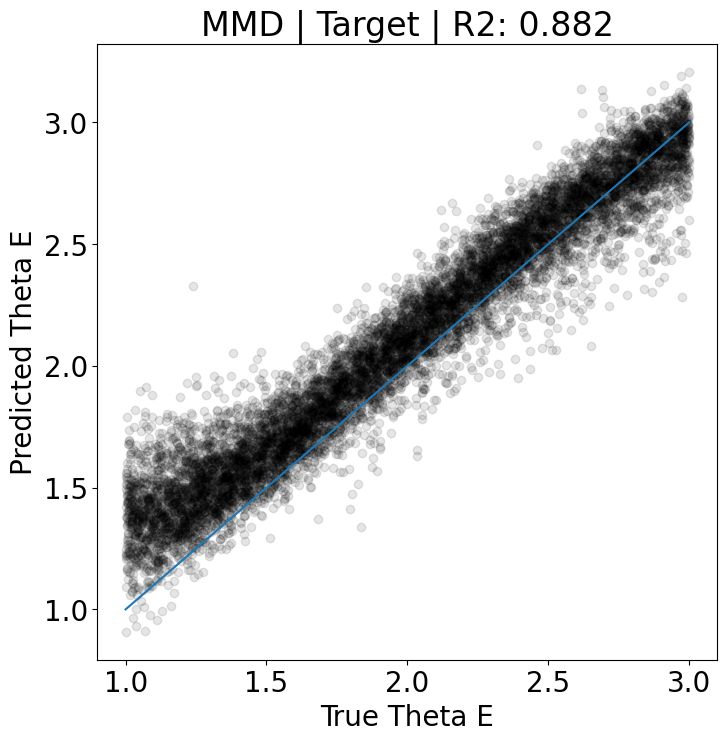

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(true_target, preds_target,  color='black', alpha = 0.1)
line = np.linspace(1, 3, 100)
plt.plot(line, line)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Target | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'MMD | Target | R2: 0.882')

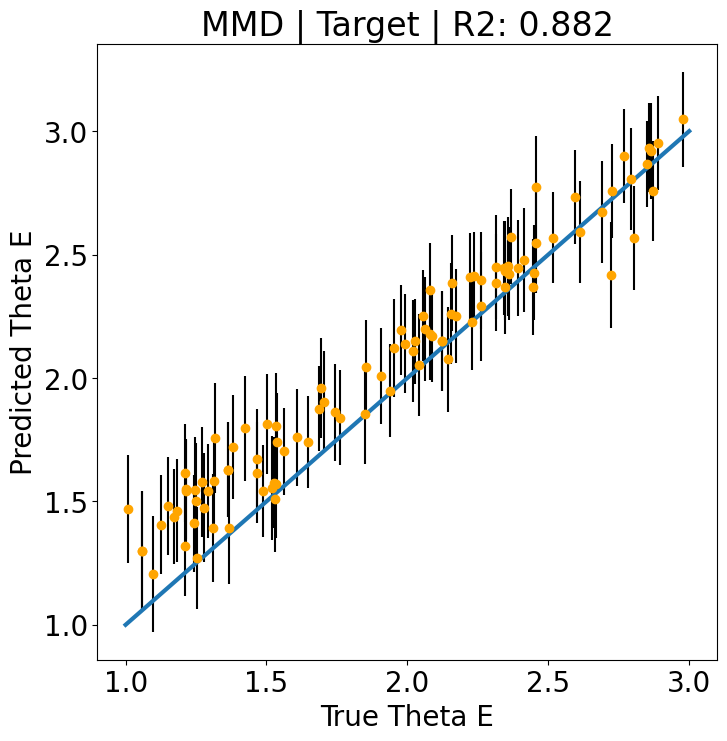

In [24]:
plt.figure(figsize=(8,8))
idx = np.random.choice(np.arange(len(true_target)), 100)
plt.errorbar(true_target[idx], preds_target[idx], yerr = np.sqrt(var_preds_target[idx]), fmt = 'o', color='orange', ecolor = 'k', alpha = 1)
line = np.linspace(1, 3, 100)
plt.plot(line, line, lw = 3)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Target | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'Uncertainty | Target | BNLL: -0.231')

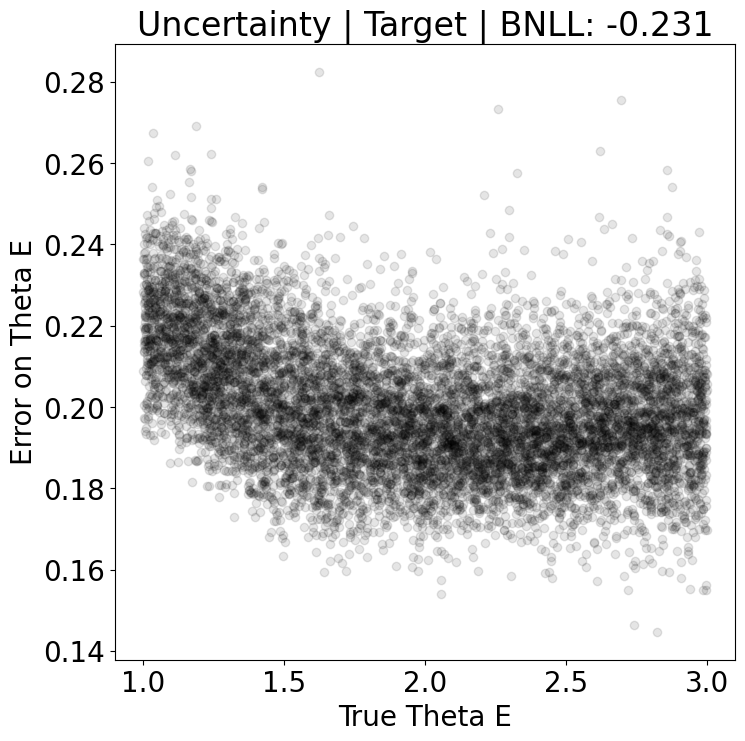

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(true_target, np.sqrt(var_preds_target),  color='black', alpha = 0.1)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Error on Theta E');
plt.rc('font', size=20)
plt.title('Uncertainty | Target | BNLL: {0:.3f}'.format(np.mean(lbnll_target)))

In [26]:
def sample_variance(obs, true):
    return np.std(obs - true) ** 2

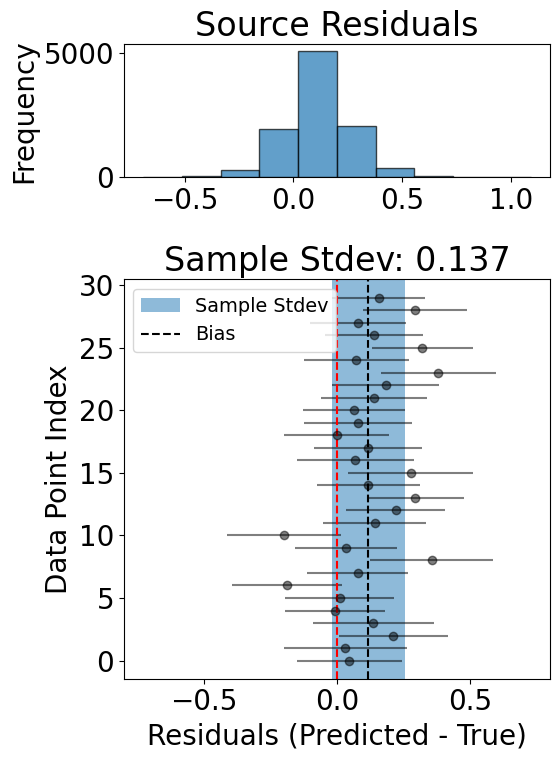

In [27]:
n_points = 30
rand_idx = np.random.choice(np.arange(len(preds_source)), n_points)
residuals = preds_source[rand_idx] - true_source[rand_idx]
resid_all = preds_target - true_target
errors = np.sqrt(var_preds_source[rand_idx])
sv = np.sqrt(sample_variance(preds_source, true_source))
mn = np.mean(resid_all)

# Create the figure and axes
fig, (ax_hist, ax_resid) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(6, 8))



# Plot the histogram
ax_hist.hist(resid_all, bins=10, edgecolor='black', alpha=0.7)
ax_hist.set_title('Source Residuals')
ax_hist.set_ylabel('Frequency')

# Plot the residuals with error bars in the x-direction
ax_resid.errorbar(x=residuals, y=np.arange(n_points), xerr=errors, fmt='o', alpha=0.5, ecolor = 'k', color = 'k')
ax_resid.axvline(x=0, color='red', linestyle='--')
ax_resid.set_xlabel('Residuals (Predicted - True)')
ax_resid.set_ylabel('Data Point Index')
ax_resid.set_title('Sample Stdev: {0:.3f}'.format(sv))
ax_resid.axvspan(mn-sv, mn+sv, alpha = 0.5, label = "Sample Stdev")
ax_resid.axvline(mn, color = 'k', ls = '--', label = "Bias")
ax_resid.legend(loc = 'upper left', fontsize = 'x-small')

plt.xlim(-0.8, 0.8)

plt.tight_layout()
plt.show()

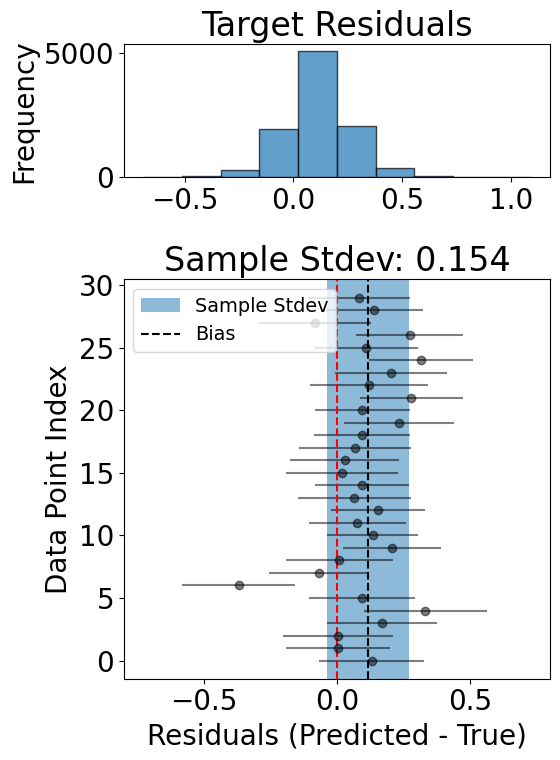

In [28]:
n_points = 30
rand_idx = np.random.choice(np.arange(len(preds_source)), n_points)
residuals = preds_target[rand_idx] - true_target[rand_idx]
resid_all = preds_target - true_target
errors = np.sqrt(var_preds_target[rand_idx])
sv = np.sqrt(sample_variance(preds_target, true_target))
mn = np.mean(resid_all)
# Create the figure and axes
fig, (ax_hist, ax_resid) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(6, 8))



# Plot the histogram
ax_hist.hist(resid_all, bins=10, edgecolor='black', alpha=0.7)
ax_hist.set_title('Target Residuals')
ax_hist.set_ylabel('Frequency')

# Plot the residuals with error bars in the x-direction
ax_resid.errorbar(x=residuals, y=np.arange(n_points), xerr=errors, fmt='o', alpha=0.5, ecolor = 'k', color = 'k')
ax_resid.axvline(x=0, color='red', linestyle='--')
ax_resid.set_xlabel('Residuals (Predicted - True)')
ax_resid.set_ylabel('Data Point Index')
ax_resid.set_title('Sample Stdev: {0:.3f}'.format(sv))
ax_resid.axvspan(mn-sv, mn+sv, alpha = 0.5, label = "Sample Stdev")
ax_resid.axvline(mn, color = 'k', ls = '--', label = "Bias")
ax_resid.legend(loc = 'upper left', fontsize = 'x-small')

plt.xlim(-0.8, 0.8)

plt.tight_layout()
plt.show()